In [1033]:
###BELOW CODE DOES NOT NEED TO BE RUN IN ORDER TO USE PROGRAM - THIS WAS ONLY FOR CROPPING IMAGES###

#first, we imported the images from the downloaded csv file for images and names, and pulls the url for images and put them
#into an array

#dataset acquired from this link https://d1p17r2m4rzlbo.cloudfront.net/wp-content/uploads/2016/07/first_and_last_names.csv
import pandas as pd
import requests
dir = 'downloaded_images2/'
dataframe = pd.read_csv('first_and_last_names.csv')
img_links = dataframe.iloc[:,:]
img_numbers = list(range(0, 129000))


In [1034]:
#puts images into a folder based off the unique links for each image
for i,url in enumerate(img_links['image_url']):
    print('Downloading Image\t{0}'.format(img_numbers[i]))
    image=requests.get(url, stream=True)
    #if image is found at the link download and save it
    if image.status_code==200:
        with open(dir+'image_'+str(img_numbers[i])+'.jpg','wb')as file:
            for content in image.iter_content(1024):
                file.write(content)

KeyboardInterrupt: 

In [74]:
#conda update anaconda-navigator  
#conda update navigator-updater  
#above on cmd
#below on anaconda terminal
#conda install -c https://conda.binstar.org/menpo opencv
import cv2
import glob

#this function takes all the images in the downloaded images folder, and crops them to get rid of useless content on the left
#or bottom

i=0 #tracks the file number
dir = 'cropped_images/'
base_directory = 'downloaded_images/'
total_files=len(glob.glob('downloaded_images/*.jpg'))
for i in range(total_files):
    try:
        img = cv2.imread(base_directory+'image_'+str(i)+'.jpg')
        img = img[0:36, 74:388]
        img = img.copy(order='C')
        cv2.imwrite('./cropped_images/img_'+str(i)+'.jpg', img)
    except Exception as e: 
        #error handling
        print(e)
        continue

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not 

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not 

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not 

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not 

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not 

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not 

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not 

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not 

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not 

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not 

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not 

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not 

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not 

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not 

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not 

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not 

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not 

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not 

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not 

In [75]:
from PIL import Image
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#conda install -c conda-forge tabulate


#loads image into an array
def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data


def transpose_image(arr):
    #after cropped image was saved, need to reshape as it was saved in 3d and not 2d
    arr=arr.transpose(2,0,1).reshape(-1,arr.shape[1])
    #attempt to get rid of garbage content above/below written text, as dataset isn't perfect
    return arr[6:30, :314]

def flip_image(arr):
    #in order to read properly for empty spaces top to bottom, array needs to be reversed
    from numpy import empty
    arr2 = empty([314,24])
    for x in range(len(arr)):
        for y in range(len(arr[x])):
            arr2[y][x] = arr[x][y]
    return arr2

def streamline_color(arr):
    #streamlines color so that background is all one color, and text is another color based on pixel shade
    for x in range(len(arr)):
        for y in range(len(arr[x])):
            if arr[x][y] >=240:
                arr[x][y] = 255
            if arr[x][y] < 240:
                arr[x][y] = 0
    return arr
   
def get_num_chars(arr):
    
    #function tracks chars based on whether there is any space from top to bottom in current column. If you get from top
    #to bottom without hitting a different colored pixel, you know this line is all background. If you hit a pixel, you know
    #you're on a letter. once you hit a letter, you continue until you get to an entire column with solid background. 
    #Once there, you know you've hit the space, so increment count by 1 and you know you're no longer on a character
    
    count = 0 #tracks number of chars
    onChar = False #tracks if you are currently in a char
    for x in range(len(arr2)):
        for y in range(len(arr2[x])):
            if arr2[x][y] <= 240: 
                if onChar == False:
                    onChar = True
                break
            if y == len(arr2[x])-1 and onChar == True:
                count+=1
                onChar = False
    #returns character count in image
    return count

arr1 = load_image('cropped_images/img_0.jpg')
arr1 = transpose_image(arr1)
arr2 = flip_image(arr1)
arr2 = streamline_color(arr2)
count = get_num_chars(arr2)
arr1= streamline_color(arr1)
data = [arr1, count]
df = pd.DataFrame([[arr1, count]], columns=['Word', 'Count'])

#establish dataframe

base_directory = 'cropped_images/'
total_files=len(glob.glob('cropped_images/*.jpg'))

for i in range(1, total_files):
    arr1 = load_image(base_directory+'img_'+str(i)+'.jpg')
    arr1 = transpose_image(arr1)
    arr2 = flip_image(arr1)
    arr2 = streamline_color(arr2)
    count = get_num_chars(arr2)
    data2 = [arr1, count]
    new_row = pd.DataFrame([[arr1, count]], columns=['Word', 'Count'])
    df = pd.concat([df, new_row], ignore_index=True)
print(df)

                                                    Word  Count
0      [[255, 255, 255, 255, 255, 255, 255, 255, 255,...      7
1      [[255, 255, 255, 255, 255, 255, 255, 255, 255,...      5
2      [[255, 255, 255, 255, 255, 255, 255, 255, 255,...      5
3      [[255, 255, 255, 255, 255, 255, 255, 255, 255,...      6
4      [[255, 255, 255, 255, 255, 255, 255, 255, 255,...      7
...                                                  ...    ...
12074  [[255, 255, 255, 255, 255, 255, 254, 253, 255,...      5
12075  [[255, 255, 255, 255, 255, 255, 254, 253, 255,...      4
12076  [[255, 255, 255, 255, 255, 255, 255, 254, 250,...      4
12077  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...      5
12078  [[255, 255, 255, 255, 255, 255, 254, 253, 255,...      6

[12079 rows x 2 columns]


In [76]:
#break apart training/ testing data. reset index is used so that test starts and index 0 and not 9968
train_data = df.Word[0:9668]
train_label = df.Count[0:9668].values
test_data = df.Word[9668:].reset_index()
test_data = test_data.Word
test_label = df.Count[9668:].reset_index()
test_label = test_label.Count.values

In [77]:
new_train = []
new_train_label = []
new_test = []
new_test_label = []

#this puts the df values into a list to get rid of whatever double arrays the df generated

def return_list(arr, newarr):
    for i in range(len(arr)):
        for j in range(len(arr[i])):
            arr[i][j] = np.array(arr[i][j])
        newarr.append(arr[i])
    return newarr

def return_list_label(arr, newarr):
    for i in range(len(arr)):
        newarr.append(arr[i])
    return newarr

new_train = return_list(train_data, new_train)
new_test = return_list(test_data, new_test)

new_train = np.array(new_train)
new_test = np.array(new_test)

In [60]:
#trying to convolute the image to recognize vertical lines, however this did not increase accuracy - do NOT RUN

import numpy as np
def convolute(arr):
    output_array = np.zeros(arr.shape)
    print(output_array.shape)
    kernel = np.array([[0, 1, 0], [0, 1, 0], [0,1,0]])
    print(kernel.shape)

    for i in range(len(arr)):
        for j in range(len(arr[i])):
            temp_array = arr[i:i+3, j:j+3]
            #skipping any parts that can't be broken into 3x3 as on average they will be edges of empty space
            if(temp_array.shape != (3,3)):
                continue
            output_array[i][j] = np.sum(temp_array*kernel)
            #print(output_array.shape)
    return output_array

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


(24, 314)
(3, 3)


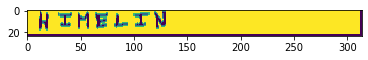

In [78]:
output_array = np.zeros(new_train[0].shape)
kernel = np.array([[0, 1, 0], [0, 1, 0], [0,1,0]])

for i in range(len(new_train[0])):
    for j in range(len(new_train[0][i])):
        temp_array = new_train[0][i:i+3, j:j+3]
        #skipping any parts that can't be broken into 3x3 as on average they will be edges of empty space
        output_array[i][j] = np.sum(temp_array*kernel)
plt.imshow(output_array)

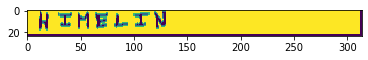

In [80]:
plt.imshow(output_array) #convoluted image

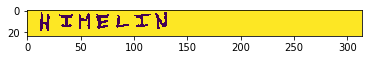

In [79]:
plt.imshow(new_train[0]) # original image

In [85]:
from keras import layers, models
network = models.Sequential()
network.add(layers.Dense(512, activation='tanh', input_shape=(24*314,)))
network.add(layers.Dense(512, activation='tanh'))
network.add(layers.Dense(512, activation='tanh'))
network.add(layers.Dense(512, activation='tanh'))
network.add(layers.Dense(32, activation='tanh'))
network.add(layers.Dense(28, activation='tanh'))
network.add(layers.Dense(20, activation='tanh'))
network.add(layers.Dense(12, activation='tanh'))
network.add(layers.Dense(10, activation='tanh'))
network.add(layers.Dense(8, activation='tanh'))
network.add(layers.Dense(6, activation='tanh'))
network.add(layers.Dense(4, activation='tanh'))
network.add(layers.Dense(24, activation='tanh'))

In [86]:
import keras
network.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

Train on 9668 samples, validate on 2411 samples
Epoch 1/5
9668/9668 [==============================] - 9s 949us/step - loss: 6.6533 - acc: 0.1157 - val_loss: 6.8595 - val_acc: 0.0050
Epoch 2/5
9668/9668 [==============================] - 9s 923us/step - loss: 6.5747 - acc: 0.0038 - val_loss: 6.5434 - val_acc: 0.0050
Epoch 3/5
9668/9668 [==============================] - 8s 779us/step - loss: 6.4409 - acc: 0.1121 - val_loss: 6.4600 - val_acc: 0.2132
Epoch 4/5
9668/9668 [==============================] - 7s 758us/step - loss: 5.6579 - acc: 0.1470 - val_loss: 5.3924 - val_acc: 0.0925
Epoch 5/5
9668/9668 [==============================] - 8s 815us/step - loss: 5.2793 - acc: 0.1284 - val_loss: 5.1578 - val_acc: 0.1796


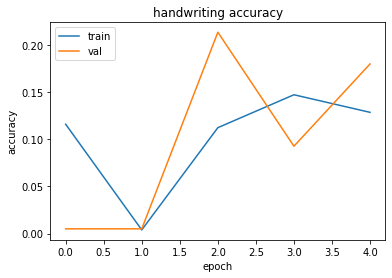

In [88]:
from keras.utils import to_categorical
from matplotlib import pyplot as plt

new_train = new_train.reshape((9668, 24*314))
new_test = new_test.reshape((2411, 24*314))
#new_train = new_train/255
#new_test = new_test/255


hist = network.fit(new_train, train_label, validation_data=(new_test, test_label), epochs=5, batch_size=128)

plt.plot(hist.history["acc"])
plt.plot(hist.history["val_acc"])
plt.title("handwriting accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="upper left")
plt.show()

#network.fit(new_train, train_label, epochs=5, batch_size=128)

In [70]:
predict2 = network.evaluate(new_test, test_label)
print(predict2)

2411/2411 [==============================] - 0s 146us/step
[8.519977450914672, 0.16590626299850975]


In [1218]:
predict = network.predict(new_test)
print(len(new_test))

2411


In [1219]:
predict2

[3.178053855895996, 0.0008295313148071339]

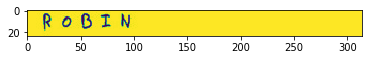

In [1220]:
plt.imshow(train_data[1])

In [72]:
arg = 28
new_test2 = []
#plt.imshow(test_data[arg])
#print(test_label[arg])
new_test2 = return_list(test_data, new_test2)
new_test2 = np.array(new_test2)
new_label2 = test_label
new_test2 = new_test2.reshape(2411, 24*314)
prediction = network.predict_classes([new_test2])
print(prediction.shape)
for p in prediction:
    print(p)

(2411,)
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


In [1171]:
count = 0
for i in train_label:
    if train_label[i] == 10:
        count+=1
        
print(count/len(train_label))
print(count)
print(len(train_label))

0.0
0
9668
